Example Usage: Using the Web Application for Gaining Insights Into the `QCC` Dataset
====================================================================================


In this example, we will use the interactive web application built into Metrics As Scores for gaining insights into the example dataset [Metrics and Domains From the Qualitas.class Corpus](https://doi.org/10.5281/zenodo.7633949).
This is one of the [known datasets](https://github.com/MrShoenel/metrics-as-scores#known-datasets) that is freely available for Metrics As Scores.


The following example **does not** require to interact with any code.
Instead we will use the text-based user interface ([**TUI**](https://github.com/MrShoenel/metrics-as-scores#text-based-user-interface-tui)) of Metrics As Scores to A) download and install the dataset and to B) launch a web application with this dataset loaded.


# Contents

Here, we will go through the following steps:

1. Install Metrics As Scores and Launch the TUI
2. Download and Install the Dataset
3. Start the Web Server
4. Use the Web Application
   - 4.1. Inspecting the Probability Densities
   - 4.2. Transformation into Distances
   - 4.3. Obtaining a Score
   - 4.4. Bonus: Inverse Sampling

# 1. Install Metrics As Scores and Launch the TUI

Metrics As Scores is an application written in Python.
It can be installed from the Python Package Index [*PyPI*](https://pypi.org/project/metrics-as-scores/) or cloned from [*Github*](https://github.com/MrShoenel/metrics-as-scores) directly.

In either case, refer to the [`README.md`](https://github.com/MrShoenel/metrics-as-scores#usage) for installing Metrics As Scores onto your local computer.

Once the package is installed, open a command prompt, activate the environment (if any), and type **`mas`**.
This will bring up the TUI:

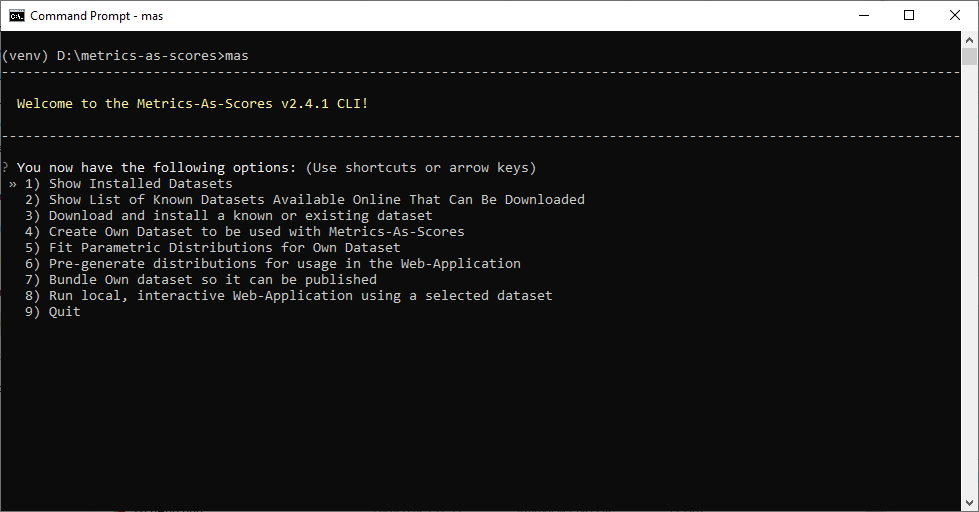

# 2. Download and Install the Dataset

In the TUI, select the option **3) Download and install a known or existing dataset**.
At the following prompt, type **`qcc`** and press [Enter]. `qcc` is the ID of the Qualitas.class corpus dataset.

    ? Enter the ID of the dataset to download:  qcc

**Tip**: There are several other known datasets. Launch option **2)** to list them.

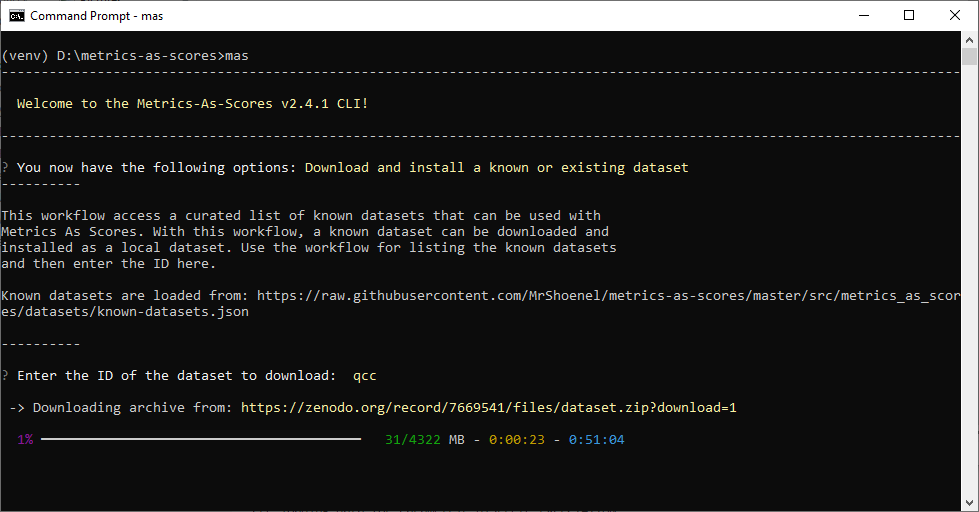

Once the download, extraction, and installation completes, we can verify that the dataset is now available for local use by activating option **1)**:

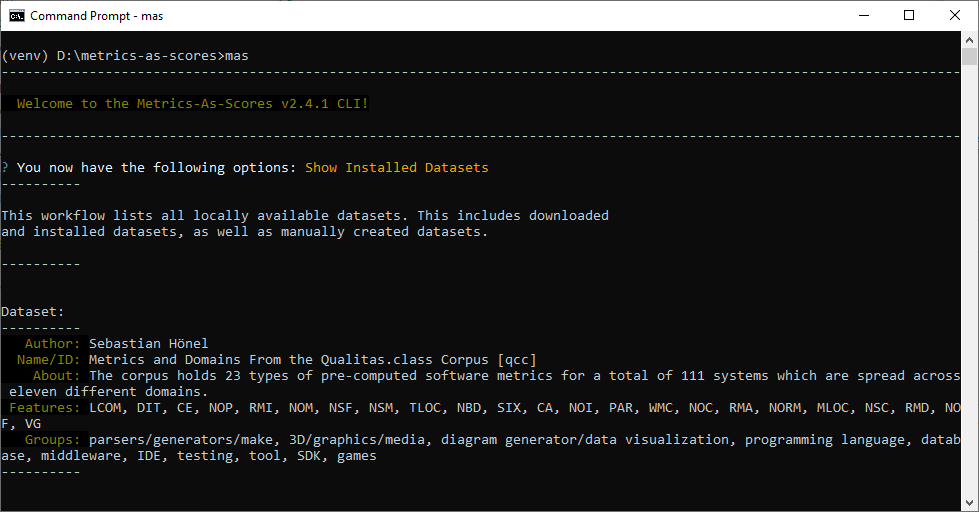

# 3. Start the Web Server

We are now prepared to start the web server!

- Choose option **8)**
- There is no need to pre-load the entire dataset into memory. For the `qcc` dataset, this requires almost 10GB.
- There is no need to alter the default port `5678`, unless you have a specific reason to do so (e.g., port already in use).
- Choose the dataset "Metrics and Domains From the Qualitas.class Corpus [qcc]" and press [Enter]

The console should show a behavior similar to the one below.
Also, the default browser is opened.
If not, navigate to the address shown in the TUI manually.

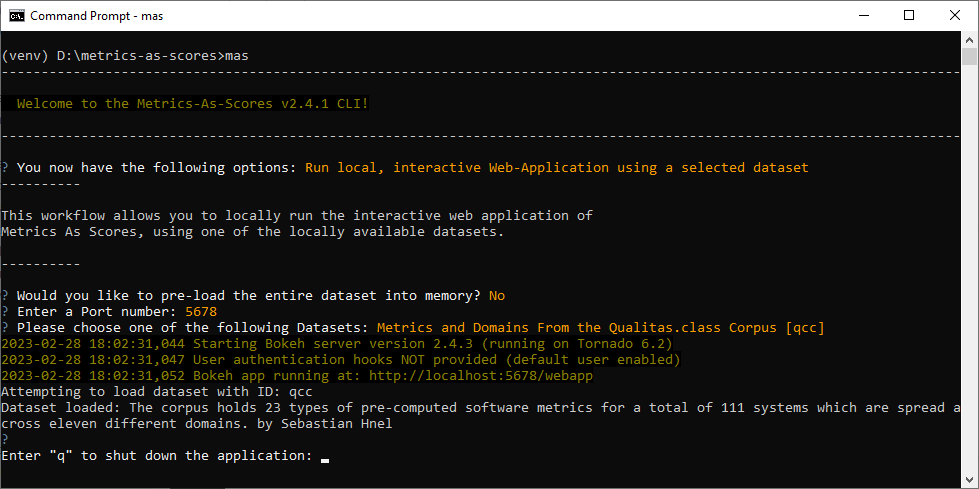

The web application should open up and look similar to the following screenshot:

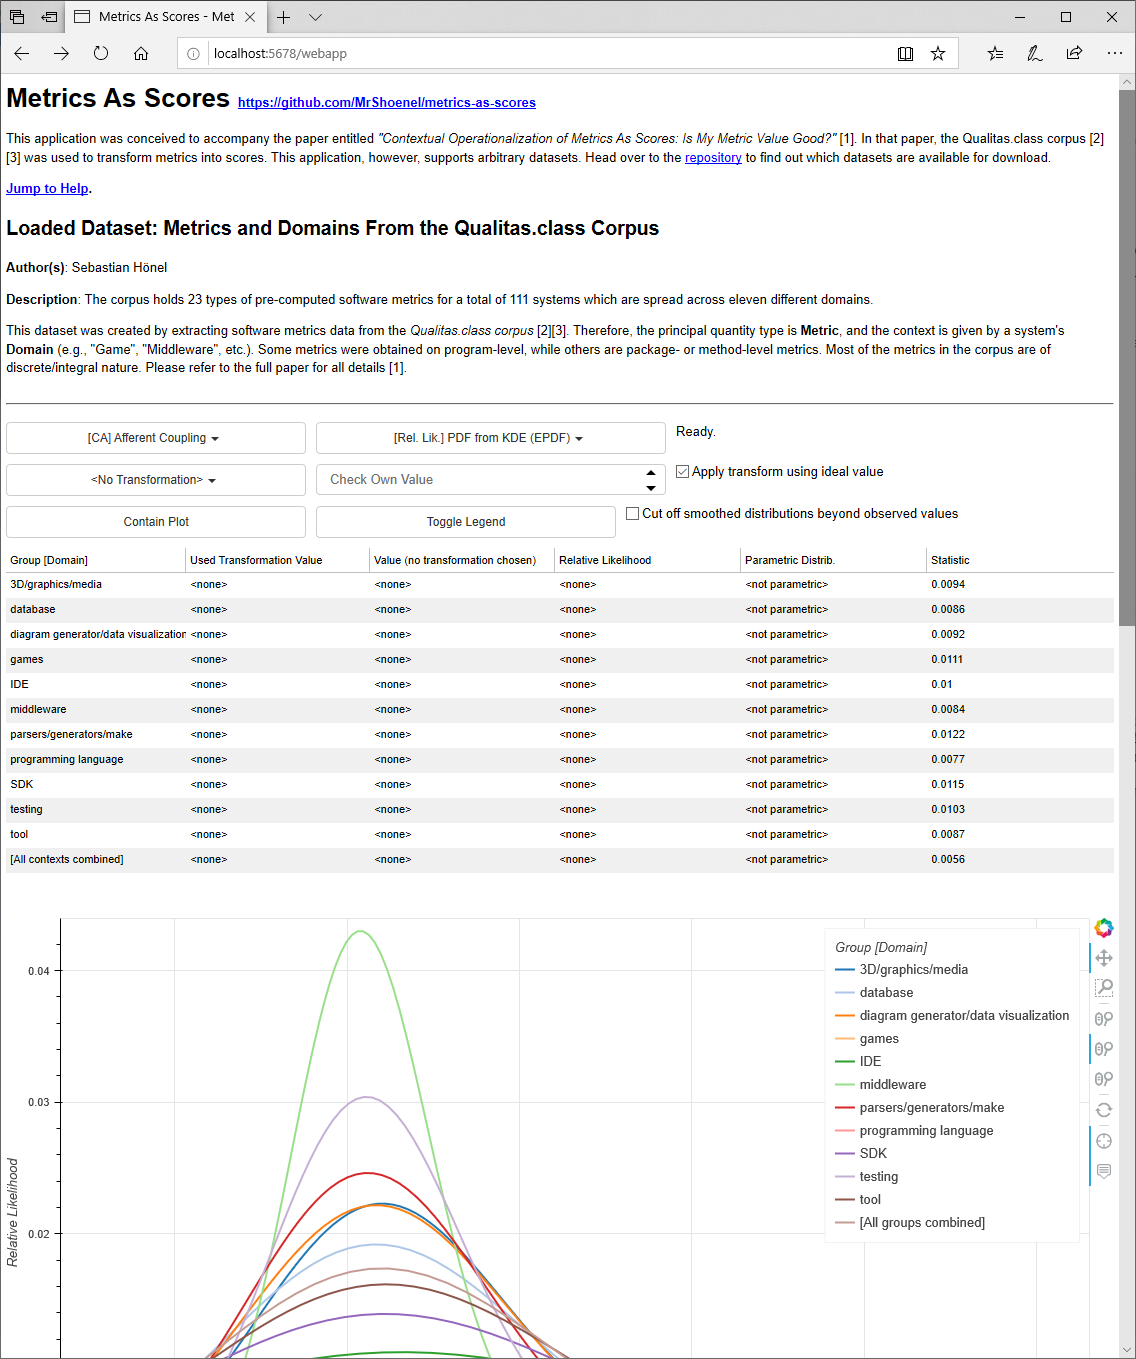

# 4. Use the Web Application

The web application is vertically divided into four major elements:

- Header/About, Dataset Info
- Plot Controls
- Plotting Area
- Help and References


In the example here, we will closely examine the software metric *Number of Packages* (**NOP**) across the various groups (here: application domains).
The principal question that Metrics As Scores can answer is: <u>**Is a certain value of a feature (here: software metric) more or less common in a group (domain)?**</u>

The web application allows finding an answer by letting the user compare the *Probability Density Function* (**PDF**), *Cumulative distribution function* (**CDF**), and its complementary CDF (**CDF**).
The web application also supports a number of transformations using some **ideal** value.
It is used to transform a distribution of observed values into a distribution of observed **distances from the ideal**.


## 4.1. Inspecting the Probability Densities

Let's look at the **PDF** of the feature **NOP** first, before we do any transformations.

Select from the plot controls:

- <u>[NOP] Number of Packages</u>
- <u>[Rel. Lik.] PDF from KDE (EPDF)</u>: Number of packages is a discrete (integral) software metric. However, for the purpose of comparing observed distributions, we will look at a kernel density estimate of the metric across all domains.
- <u>&lt;No Transformation&gt;</u>
- Tick the box <u>Cut off smoothed distributions beyond observed values</u>

Using the plot controls that are right next to the plotting area for zooming and panning, you should observe a plot similar to the following:

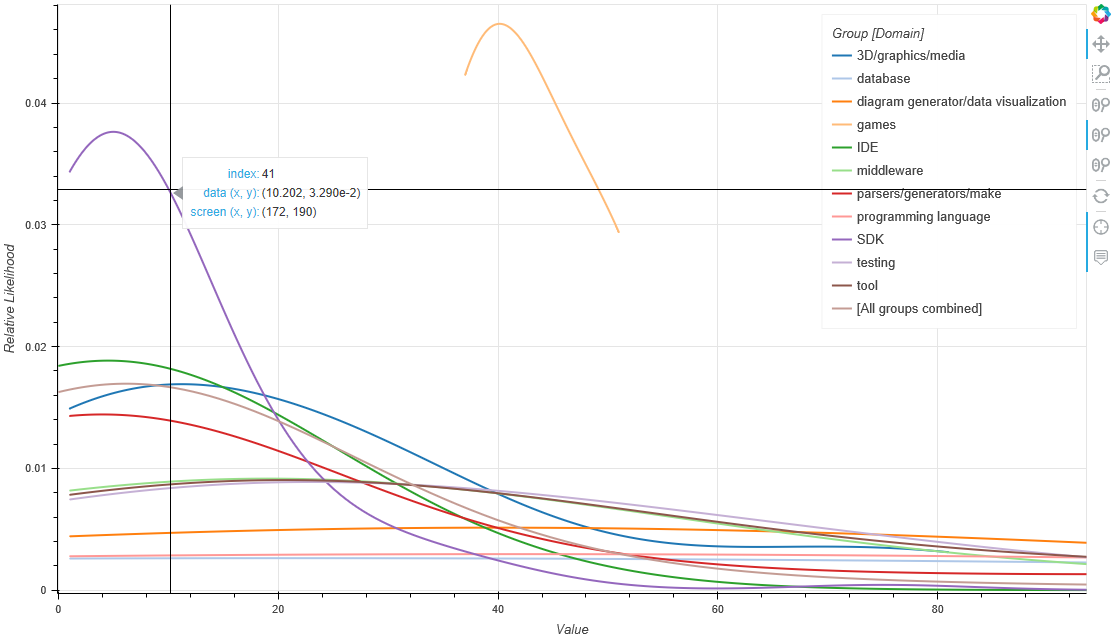

Use the mouse crosshair to hover each PDF for getting exact values.
It is apparent that NOP is a software metric that varies significantly across doamins.
For example, it appears that the number of packages in the domain *SDK* (dark purple) is much more likely to assume smaller values than, e.g., in *games* (light orange, the "floating" PDF).
Furthermore, there appear to be no games with comparatively small or large number of packages.
While low numbers of packages appear to be relatively normal in the domain *SDK*, they must perhaps be already considered outliers in other domains, such as, e.g., *diagram generator/data visualization* or *programming language*.

------------------

Examining the PDF, while useful, does however not tell us how good/bad, acceptable/alarming, or common/extreme a value for a certain metric is in a certain domain.
The main purpose of **Metrics As Scores**, as the name implies, is to attempt to give a somewhat standardized answer to this question.

Suppose you are given `NOP=25` for some application from some unknown domain.
If this metric ought to be considered in a quality model, then from the simple visualization above we already know that without knowledge of the application domain, there is no way of knowing whether `NOP=25` consitutes an extreme or common value.

"Common" and "extreme" turn into notions of quality such as "good" and "bad", respectively, if we attempt to design a software with values for metrics such as NOP that are **typical** in its targeted domain.
The typical values are those that were previously observed in the targeted domain.
Metrics As Scores can give a standardized answer to how common a value compared to the previously observed ones is, by facilitating the **rank transform**.
Since probability densities (PDFs) are rarely uniform in nature, their associated cumulative distributions (CDFs) are rarely linear.
Using CDFs instead of PDFs allows us to compare different software metrics, or the same metric in different domains.
The CDF expresses the probability to find a value *less than or equal to* the given value.
Therefore it expresses how extreme a value is.


## 4.2. Transformation into Distances

While so far this was is already quite useful, the answer to <u>is my software metric value good?</u> requires a notion of quality (i.e., instead of common/extreme, we are after good/bad).
This is where **transformations** come into play.
Suppose you are developing a new SDK.
The number of packages is an indicator for, e.g., the complexity and range of features of the new application.
In other words, an SDK with too few or too many packages might hint at bad application design.
Too few packages could indicate bad componentization, while too many could imply that the new SDK wants to be a jack of all trades (i.e., covering too many, unnecessary features).

Select from the plot controls:

- <u>E[X] (expectation)</u>: This is the mean (expected value) for each domain.

You should get a figure similar to the following one:

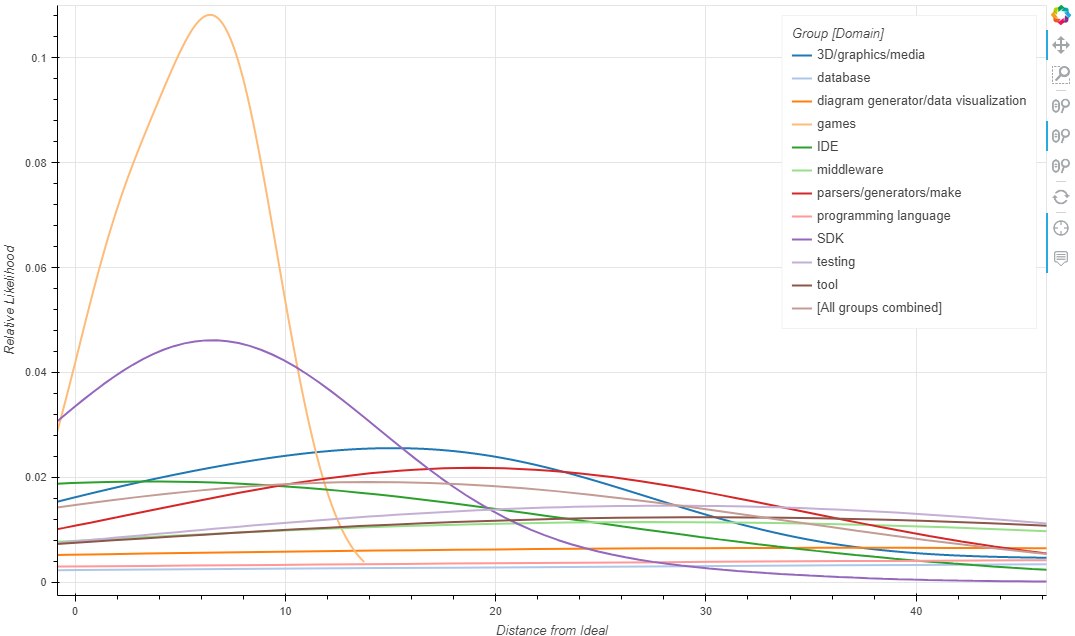

Also, observe the table above the plotting area:

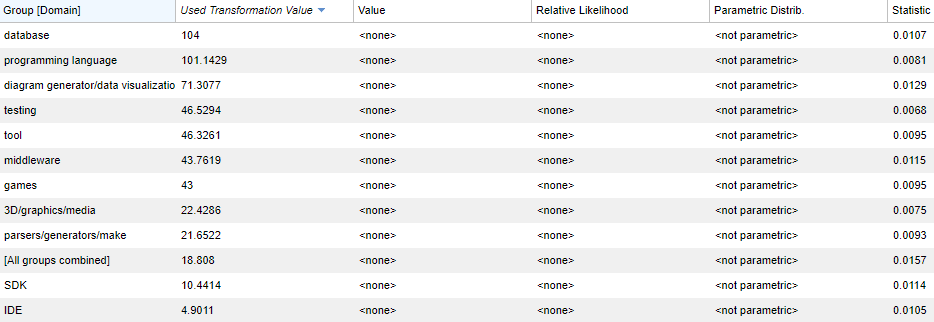

It becomes quite obvious now that the *expected number of packages* varies significantly across application domains.
While databases and programming languages consist of comparatively many packages, SDKs, IDEs, as well as all software in general (all domains combined) consist *typically* of a much lower number of packages.


## 4.3. Obtaining a Score

Our example of `NOP=25` would result in very different relative likelihoods for that value across application domains.
Using the CCDF instead of the PDF, however, allows us now to plug in this value into the CCDF of each application domain and obtain a <u>**score**</u>.
A score, therefore, is a *normalized* rank.
Here, normalized means *rectified*, having a range of $[0,1]$.
We can now compare scores.

Select from the plot controls:

- <u>[Score] Smoothed approx. ECCDF from KDE</u>: We will stick to smooth functions. If you want to obtain precise scores, you need to select <u>[Score] CCDF from Empirical (ECCDF)</u>. Note that the CCDF inverses the CDFs meaning: It now represents the probability, to find a value (here: distance from ideal) larger than the given value (distance).
- <u>Check Own Value</u>: Fill in the value `25`
- <u>Apply transform using ideal value</u>: **Check** this box. If unchecked, it will take the value `25` as distance from ideal, which is not what we want. We observed `25` for our new SDK and want to know how far it is away from each domain's expected value. Checking this box will calculate the distance as $d_i=\left|\,\mathbf{E}[X_i]-25\,\right|$, for each $i$-th domain.


In the following figure, the table shows, for each application domain, its expected value (used transformation value), the calculated $d_i$ value for each domain (distance transformed using ideal), as well the **score** this corresponds to.
Our new hypothetical SDK scores very well for the application domains of, e.g., *parsers/generators/make* and *3D/graphics/media*, while it scores actually very poorly for the domain of previously observed SDKs.
While we already guessed that from looking at the PDF earlier, using the (C)CDF of each domain allows us to obtain and compare scores in an *apples-to-apples* manner now

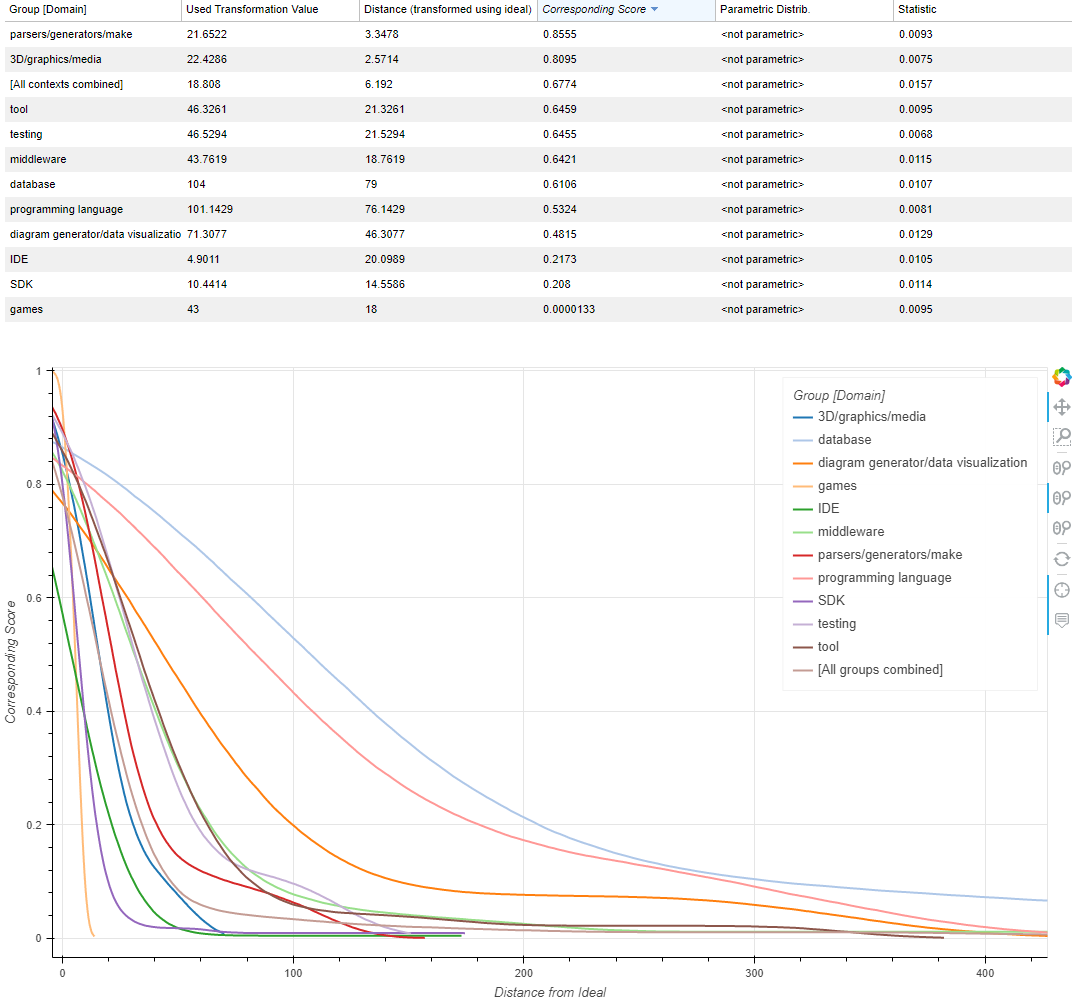

We have now obtained the score for a single domain of our new hypothetical SDK.
Note that the Qualitas.class corpus holds `23` different software metrics.
Suppose we were to obtain scores for each of these, then this information could be used and aggregated to, e.g., classify software applications or for assigning an overall quality value.

## 4.4. Bonus: Pseudo-random Sampling

Next to PDF/PMF and (C)CDF, the web application also grant us access to the quantile- or percent point function (PPF).
The PPF can be used to pseudo-randomly (inversely) sample from the distribution of observed values.
This can be used for, e.g., sampling of instances with domain-typical values.

Select from the plot controls:

- <u>[Quantiles] Smoothed approx. inverse ECCDF from KDE</u>: This kind of PPF was obtained sampling from the original quantity's KDE, then estimating a smooth CDF, and inversing it.
- <u>Check Probability to Sample a Value</u>: In this box, use a probability of `0.95`.

This should generate a figure similar to the following (you may need to toggle the legend to see all PPFs).
It is obvious that the PPFs for each domain will yield quite different values.
The table for this example shows approx. 614 packages for a database application, and approx. 11 packages for a game.

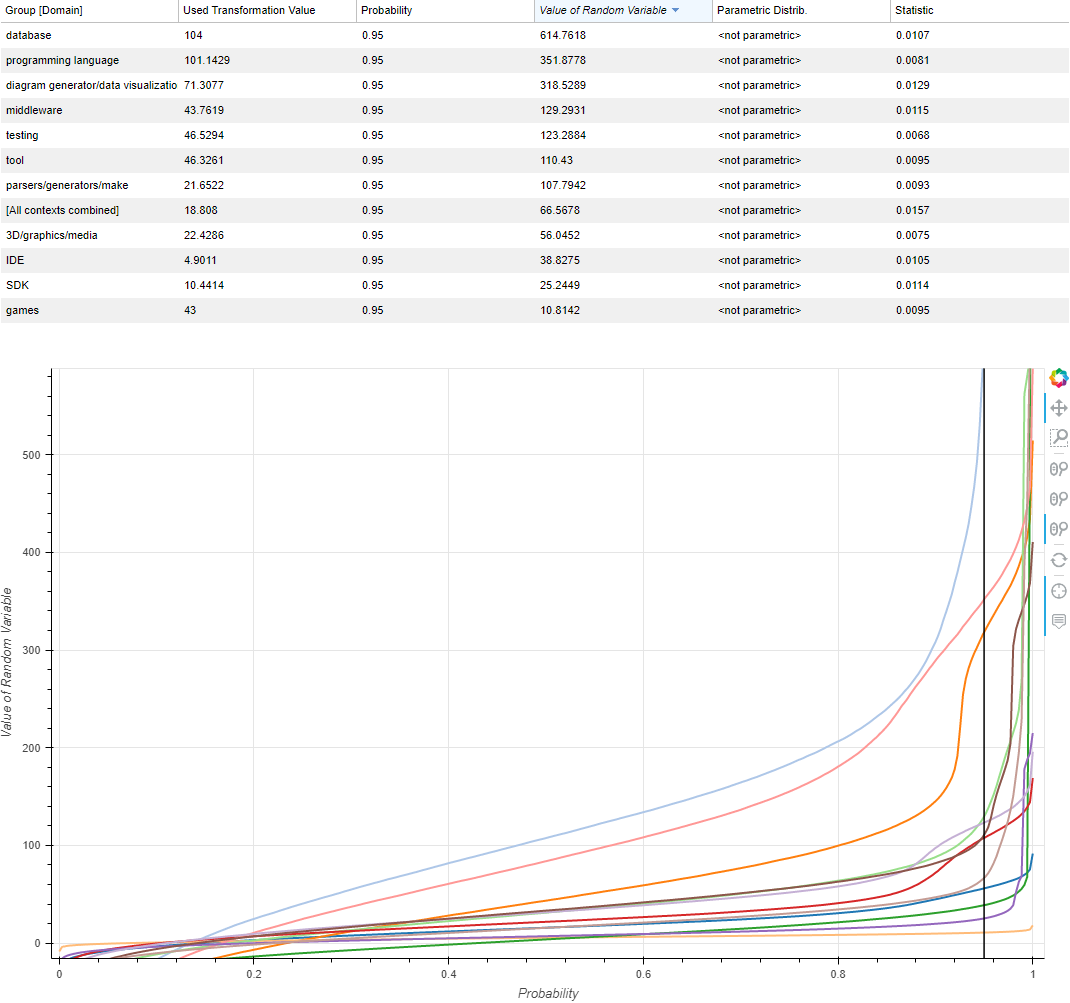